## Some setup

In [1]:
import sympy

In [2]:
x,a,b,x1,B=SR.var('x,a,b, x1,B')

In [3]:
f(x)=x^(a-1)*(1-x)^(b-1)/beta(a,b)

The peak of $f(x)$ is at

In [4]:
m(a,b)=(a-1)/(a+b-2);
m(a,b).show()

(a - 1)/(a + b - 2)

We see this from a picture

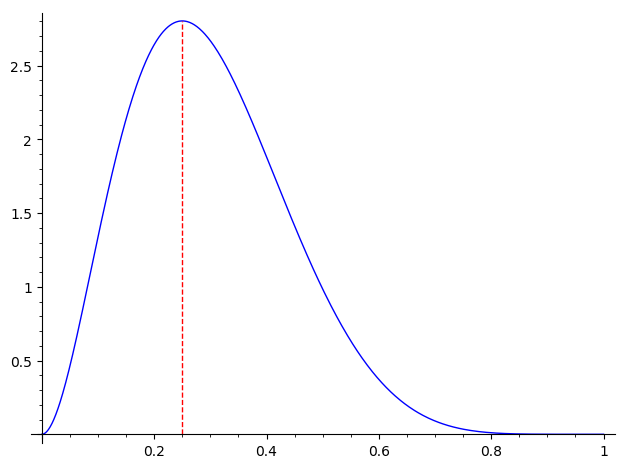

In [5]:
f_ex(x) = f(x).subs(a==3).subs(b==7);
m_ex = m(3,7);
plot(f_ex(x),(x,0,1))+line([(m_ex,0),(m_ex,f_ex(m_ex))], color='red',linestyle='--')

We define $f^{-1}(x)$ to be the inverse of left and right side of $f(x)$ for $1>x>m(a,b)$ and $m(a,b)>x>0$ respectively.

In [6]:
finv=function('finv', latex_name="f^{-1}")

Let $r(x)=f(f^{-1}(x))$, which reflects a point $x$ to throught the curve of $f(x)$. We want to show that $r(x)$ is convex if $b>a>1$. See my [previous post](./the-convexity-property-related-to-beta-densities.html) for pictures.

In [7]:
r(x)=finv(f(x))

In [8]:
r(x).show()

finv(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b))

This is $f(x)$'s direvative.

In [9]:
df(x)=diff(f(x),x).combine();
df(x).show()

((a - 1)*x^(a - 2)*(-x + 1)^(b - 1) - (b - 1)*x^(a - 1)*(-x + 1)^(b - 2))/beta(a, b)

This is $f^{-1}(x)$'s direvative.

In [10]:
dfinv(x)=1/df(finv(x));
dfinv(x).show()

-beta(a, b)/((b - 1)*(-finv(x) + 1)^(b - 2)*finv(x)^(a - 1) - (a - 1)*(-finv(x) + 1)^(b - 1)*finv(x)^(a - 2))

## First direvative of $r(x)$

In [11]:
rd1=diff(r(x),x);
rd1.show()

((a - 1)*x^(a - 2)*(-x + 1)^(b - 1)/beta(a, b) - (b - 1)*x^(a - 1)*(-x + 1)^(b - 2)/beta(a, b))*D[0](finv)(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b))

In [12]:
to_be_replace=rd1.operands()[1];
to_be_replace.show()

D[0](finv)(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b))

In [13]:
rd1_0=rd1.subs(to_be_replace==dfinv(f(x)));
rd1_0.show()

-((a - 1)*x^(a - 2)*(-x + 1)^(b - 1)/beta(a, b) - (b - 1)*x^(a - 1)*(-x + 1)^(b - 2)/beta(a, b))*beta(a, b)/((b - 1)*(-finv(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b)) + 1)^(b - 2)*finv(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b))^(a - 1) - (a - 1)*(-finv(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b)) + 1)^(b - 1)*finv(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b))^(a - 2))

Make it a easier to manipulate by changing some symbobls. Let $B=\beta(a,b)$ and $x_1$ be the reflection point of $x$.

In [14]:
rd1_1=rd1_0.subs(finv(f(x))==x1).subs(beta(a,b)==B);
rd1_1.show()

((a - 1)*x^(a - 2)*(-x + 1)^(b - 1)/B - (b - 1)*x^(a - 1)*(-x + 1)^(b - 2)/B)*B/((a - 1)*x1^(a - 2)*(-x1 + 1)^(b - 1) - (b - 1)*x1^(a - 1)*(-x1 + 1)^(b - 2))

Simplify using sympy.

In [15]:
rd1_2=rd1_1._sympy_().simplify()._sage_();

In [16]:
rd1_2.show()

((a - 1)*x^(a - 2)*(-x + 1)^(b - 1) - (b - 1)*x^(a - 1)*(-x + 1)^(b - 2))/((a - 1)*x1^(a - 2)*(-x1 + 1)^(b - 1) - (b - 1)*x1^(a - 1)*(-x1 + 1)^(b - 2))

Note that we have three equalities.

In [17]:
eq1=beta(a,b)*f(x)==beta(a,b)*f(x1);
eq1.show()

x^(a - 1)*(-x + 1)^(b - 1) == x1^(a - 1)*(-x1 + 1)^(b - 1)

In [18]:
eq2=eq1.op[1]/eq1.op[1,1]==eq1.op[0]/eq1.op[1,1];
eq2.show()

x1^(a - 1) == x^(a - 1)*(-x + 1)^(b - 1)/(-x1 + 1)^(b - 1)

In [19]:
eq3=eq1.op[1]/eq1.op[1,0]==eq1.op[0]/eq1.op[1,0];
eq3.show()

(-x1 + 1)^(b - 1) == x^(a - 1)*(-x + 1)^(b - 1)/x1^(a - 1)

Now we simplify again use these equations.

In [20]:
rd1_3=rd1_2._sympy_().subs(eq2.op[0],eq2.op[1]).subs(eq3.op[0],eq3.op[1]).simplify().together()._sage_()
rd1_3.show()

(a*(x - 1) + b*x - 2*x + 1)*(x1 - 1)*x1/((a*(x1 - 1) + b*x1 - 2*x1 + 1)*(x - 1)*x)

The final form for $r'(x)$ is

In [21]:
rd1_4=rd1_3.subs(x1==finv(f(x)));
rd1_4.show()

(a*(x - 1) + b*x - 2*x + 1)*(finv(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b)) - 1)*finv(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b))/((a*(finv(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b)) - 1) + b*finv(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b)) - 2*finv(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b)) + 1)*(x - 1)*x)

## Second direvative

In [22]:
rd2_0=rd1_4.diff(x);
[o.show() for o in rd2_0.op[0].op];

a*(x - 1) + b*x - 2*x + 1

1/(a*(finv(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b)) - 1) + b*finv(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b)) - 2*finv(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b)) + 1)

(a - 1)*x^(a - 2)*(-x + 1)^(b - 1)/beta(a, b) - (b - 1)*x^(a - 1)*(-x + 1)^(b - 2)/beta(a, b)

1/(x - 1)

1/x

finv(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b)) - 1

D[0](finv)(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b))

In [23]:
to_be_replace_2=rd2_0.op[0].op[-1];
to_be_replace_2.show();

D[0](finv)(x^(a - 1)*(-x + 1)^(b - 1)/beta(a, b))

In [24]:
rd2_1=rd2_0.subs(to_be_replace_2==dfinv(f(x))).subs(finv(f(x))==x1).subs(beta(a,b)==B);
rd2_1.show()

(a*(x - 1) + b*x - 2*x + 1)*((a - 1)*x^(a - 2)*(-x + 1)^(b - 1)/B - (b - 1)*x^(a - 1)*(-x + 1)^(b - 2)/B)*B*(x1 - 1)/(((a - 1)*x1^(a - 2)*(-x1 + 1)^(b - 1) - (b - 1)*x1^(a - 1)*(-x1 + 1)^(b - 2))*(a*(x1 - 1) + b*x1 - 2*x1 + 1)*(x - 1)*x) + (a*(x - 1) + b*x - 2*x + 1)*((a - 1)*x^(a - 2)*(-x + 1)^(b - 1)/B - (b - 1)*x^(a - 1)*(-x + 1)^(b - 2)/B)*B*x1/(((a - 1)*x1^(a - 2)*(-x1 + 1)^(b - 1) - (b - 1)*x1^(a - 1)*(-x1 + 1)^(b - 2))*(a*(x1 - 1) + b*x1 - 2*x1 + 1)*(x - 1)*x) - (((a - 1)*x^(a - 2)*(-x + 1)^(b - 1)/B - (b - 1)*x^(a - 1)*(-x + 1)^(b - 2)/B)*B*a/((a - 1)*x1^(a - 2)*(-x1 + 1)^(b - 1) - (b - 1)*x1^(a - 1)*(-x1 + 1)^(b - 2)) + ((a - 1)*x^(a - 2)*(-x + 1)^(b - 1)/B - (b - 1)*x^(a - 1)*(-x + 1)^(b - 2)/B)*B*b/((a - 1)*x1^(a - 2)*(-x1 + 1)^(b - 1) - (b - 1)*x1^(a - 1)*(-x1 + 1)^(b - 2)) - 2*((a - 1)*x^(a - 2)*(-x + 1)^(b - 1)/B - (b - 1)*x^(a - 1)*(-x + 1)^(b - 2)/B)*B/((a - 1)*x1^(a - 2)*(-x1 + 1)^(b - 1) - (b - 1)*x1^(a - 1)*(-x1 + 1)^(b - 2)))*(a*(x - 1) + b*x - 2*x + 1)*(x1 - 1)*x1/((a*(x1 - 1) + b*x1 - 2*x1 + 1)^2*(x - 1)*x) + (a + b - 2)*(x1 - 1)*x1/((a*(x1 - 1) + b*x1 - 2*x1 + 1)*(x - 1)*x) - (a*(x - 1) + b*x - 2*x + 1)*(x1 - 1)*x1/((a*(x1 - 1) + b*x1 - 2*x1 + 1)*(x - 1)*x^2) - (a*(x - 1) + b*x - 2*x + 1)*(x1 - 1)*x1/((a*(x1 - 1) + b*x1 - 2*x1 + 1)*(x - 1)^2*x)

This is a lot, but again we can use `eq2,eq3` to simplify.

In [25]:
rd2_2=rd2_1._sympy_().subs(eq2.op[0],eq2.op[1]).subs(eq3.op[0],eq3.op[1]);

Some more simplification with `sympy`, and study the denominator and numerator separately.

In [26]:
rd2_numer, rd2_denom=sympy.fraction(rd2_2.together())

The denominator.

In [27]:
rd2_denom1=rd2_denom.simplify()._sage_();
rd2_denom1.show()

(a*(x1 - 1) + b*x1 - 2*x1 + 1)^2*(x - 1)^2*x^2*((b - 1)/(x1 - 1) + (a - 1)/x1)

We want the 2nd direvative to be positive when $b>a>1$, so we can ingore the first 3 terms, which are positive.

In [28]:
rd2_denom2=rd2_denom1.op[-1];
rd2_denom2.show()

(b - 1)/(x1 - 1) + (a - 1)/x1

The numerator.

In [29]:
rd2_numer1=rd2_numer.simplify()._sage_();
rd2_numer1.show()

a^2*b*x^2 + a*b^2*x^2 - a^2*b*x1^2 - a*b^2*x1^2 - 2*a^2*b*x - a^2*x^2 - 4*a*b*x^2 - b^2*x^2 + 2*a^2*b*x1 + a^2*x1^2 + 4*a*b*x1^2 + b^2*x1^2 + 2*a^2*x + 4*a*b*x + 3*a*x^2 + 3*b*x^2 - 2*a^2*x1 - 4*a*b*x1 - 3*a*x1^2 - 3*b*x1^2 - 4*a*x - 2*b*x - 2*x^2 + 4*a*x1 + 2*b*x1 + 2*x1^2 + 2*x - 2*x1

Put the numerator and denominator back and separte them again, which actually simplifies again.


In [30]:
numer3,denom3=sympy.fraction((rd2_numer1/rd2_denom2)._sympy_().together())

The denominator.

In [31]:
denom3.expand().collect(x1)._sage_().show()

(a + b - 2)*x1 - a + 1

This is $>0$ if $x_1 > m(a,b)= (a-1)/(a+b-2)$, which is our assumption. So the denominator does not matter.

Factor the numerator

In [32]:
numer4=numer3.factor()._sage_();
numer4.show()

(a*x + b*x + a*x1 + b*x1 - 2*a - 2*x - 2*x1 + 2)*(a - 1)*(b - 1)*(x - x1)*(x1 - 1)*x1

If we restrict that $x<x_1$, then the last 4 terms are positive. So we can drop them. We only need to show the 1st term is positve.

In [33]:
numer5 = numer4.op[0];
numer5.show()

a*x + b*x + a*x1 + b*x1 - 2*a - 2*x - 2*x1 + 2

In [34]:
numer6=numer5._sympy_().collect(x).collect(x1).collect(a+b-2);
numer6._sage_().show()

(a + b - 2)*(x + x1) - 2*a + 2

This is $>0$ if
$$
x+x_1>\frac{2 a +2 }{a+b-2}
$$
and I mentioned in my [earlier post](./the-convexity-property-related-to-beta-densities.html), this is very simple and is left as an exercise.